Travel Aggregator Analysis Certification Project

Scenario Travelling has significantly changed thanks to technology. In the earlier days, it was not easy to travel as booking journeys used to be a hassle, where people needed to contact travel agents, get prices and then do a lot of paperwork. But, with the advent of online apps, it becomes easier to book tickets. However, one challenge is still there. Due to many available apps which offer bookings, there can be a lot of comparisons for getting the best price. A new Indian start-up, "MyNextBooking” is an aggregator on top of the available top platforms (Yatra, MMT, Goibibo). It helps the user compare prices for their upcoming journeys on its platform and the customer is redirected to the desired platform after looking at the price. However, they need to do a lot of analysis of the data which they have collected over a while. As a newly hired analyst and proficiency in Python, your role is to help them perform an indepth analysi

About the Data: The data provided consists of the following two files1 . 
Bookings.csv • customer_id • booking_id • from_city Data Science and Machine Learning Program 4 • from_country • to_city • to_country • bookingm      e • device_type_used • INR_Amount • service_name • no_of_passengers • days_to_departure • distank22 . m
Sessions.csv • session_id • search_id • search_time • session_starting_time • booking_ids.

Objective: Please provide answers to the following questions:
1 
Find the number of distinct bookings, sessions, and searches from the given data sets2 .
How many sessions have more than one bookin3 g?
Which days of the week have the highest number of bookings? Also, draw a pie chart to show the distribution for all days of the we4 ek?
For each of the service names, display the total number of bookings and the total Gross Booking Value in INR. Data Science and Machine Learning Progr5 am 3
For customers who have more than 1 booking, which is the most booked route (from_city to to_c6 ity)?
Which are the top 3 departure cities from where customers book mostly in advance, provided that there have been at least 5 departures from that7  city?
Plot a heatmap displaying correlations of the numerical column and report which pair of numerical columns in the bookings data set, have the maximum corre8 lation?
For each service, which is the most used device type for making bookings on the p9 latform?
Plot the trends at a quarterly frequency for the number of bookings by each of the device types, that is, plot a time series for each year and quarter showing the number of bookings performed by each dev10 ice type.
Consider the following example: 12 customers performed a total of 100 searches but only a few of them performed 10 bookings in total. Searches = 100 bookings = 10 customers = 12 The overall booking to search ratio, Ober, is 10/100 = 0.1 Using the above information/context, answer the following: • What is the average oBSR for each month of the year? -• What is the average oBSR for each day of the week? • Plot a time series of oBSR on all the given dates.iven dates.

In [443]:
import pandas as pd
import numpy as np
import scipy as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [445]:
bookings=pd.read_csv("bookings.csv")
sessions=pd.read_csv("sessions.csv")

bookings

,customer_id,booking_id,from_city,from_country,to_city,to_country,booking_time,device_type_used,INR_Amount,service_name,no_of_passengers,days_to_departure,distance_km
0,customer_259,booking_82,Gurgaon,India,Ahmedabad,India,2020-02-05T16:12:08Z,Desktop,2565.28,MMT,1.0,10.0,747.8
1,customer_303,booking_156,Delhi,India,Brussels,Belgium,2018-11-21T08:21:47Z,Android,23120.00,YATRA,1.0,1.0,6701.5
2,customer_203,booking_99,Devanhalli,India,Frankfurt am Main,Germany,2019-12-16T22:54:58Z,Android,25717.60,YATRA,1.0,32.0,7712.0
3,customer_211,booking_319,Gurgaon,India,Frankfurt am Main,Germany,2021-10-29T12:25:38Z,Desktop,135969.60,GOIBIBO,2.0,69.0,6112.5
4,customer_287,booking_222,Gurgaon,India,Roissy-en-France,France,2020-08-11T16:09:10Z,Android,31791.20,GOIBIBO,1.0,3.0,6570.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,customer_133,booking_238,Gurgaon,India,Rāja Sānsi,India,2020-02-14T14:20:20Z,IOS,2721.60,YATRA,1.0,26.0,421.0
335,customer_235,booking_37,Gurgaon,India,Bhubaneswar,India,2020-03-21T06:40:56Z,Android,6552.00,GOIBIBO,1.0,0.0,1274.7
336,customer_62,booking_239,Gurgaon,India,Birmingham,United Kingdom,2020-01-31T20:35:35Z,Desktop,126502.46,GOIBIBO,2.0,109.0,7190.9
337,customer_5,booking_131,Mumbai,India,Kloten,Switzerland,2018-10-11T14:31:28Z,Desktop,55152.80,YATRA,2.0,22.0,6760.0


In [447]:
sessions

,session_id,search_id,search_time,session_starting_time,booking_id
0,session_322,search_784,2020-01-21T21:35:38.910Z,2020-01-21T21:10:12Z,NaN
1,session_322,search_776,2020-01-21T21:37:37.697Z,2020-01-21T21:10:12Z,NaN
2,session_322,search_623,2020-01-21T21:36:11.392Z,2020-01-21T21:10:12Z,NaN
3,session_322,search_270,2020-01-21T21:16:07.685Z,2020-01-21T21:10:12Z,NaN
4,session_322,search_905,2020-01-21T21:34:55.673Z,2020-01-21T21:10:12Z,NaN
...,...,...,...,...,...
1492,session_150,search_156,2018-12-18T22:59:43.764Z,2018-12-18T22:45:56Z,booking_120
1493,session_120,search_1096,2021-12-23T17:29:37Z,2021-12-23T17:29:33.217Z,NaN
1494,session_120,search_962,2021-12-23T17:34:39Z,2021-12-23T17:29:33.217Z,NaN
1495,session_150,search_1306,2018-12-18T22:52:37.654Z,2018-12-18T22:45:56Z,NaN


In [449]:
bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339 entries, 0 to 338
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        339 non-null    object 
 1   booking_id         339 non-null    object 
 2   from_city          339 non-null    object 
 3   from_country       339 non-null    object 
 4   to_city            339 non-null    object 
 5   to_country         339 non-null    object 
 6   booking_time       339 non-null    object 
 7   device_type_used   339 non-null    object 
 8   INR_Amount         339 non-null    float64
 9   service_name       339 non-null    object 
 10  no_of_passengers   339 non-null    float64
 11  days_to_departure  339 non-null    float64
 12  distance_km        339 non-null    float64
dtypes: float64(4), object(9)
memory usage: 34.6+ KB


In [451]:
sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1497 entries, 0 to 1496
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   session_id             1497 non-null   object
 1   search_id              1497 non-null   object
 2   search_time            1497 non-null   object
 3   session_starting_time  1497 non-null   object
 4   booking_id             366 non-null    object
dtypes: object(5)
memory usage: 58.6+ KB


In [453]:
# 1. Find the number of distinct bookings, sessions, and searches from the given data sets.

number_of_booking = bookings["booking_id"].nunique()


number_of_sessions = sessions["session_id"].nunique()


number_of_searches = sessions["search_id"].nunique()

print("Number of distinct bookings are: " , number_of_booking)
print("Number of distinct sessions are: " , number_of_sessions)
print("Number of distinct searches are: " , number_of_searches)

Number of distinct bookings are:  339
Number of distinct sessions are:  331
Number of distinct searches are:  1360


In [455]:
# 2) How many sessions have more than one booking?

merge_ = sessions.merge(bookings, on = "booking_id", how = "left")
merge_

,session_id,search_id,search_time,session_starting_time,booking_id,customer_id,from_city,from_country,to_city,to_country,booking_time,device_type_used,INR_Amount,service_name,no_of_passengers,days_to_departure,distance_km
0,session_322,search_784,2020-01-21T21:35:38.910Z,2020-01-21T21:10:12Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,session_322,search_776,2020-01-21T21:37:37.697Z,2020-01-21T21:10:12Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,session_322,search_623,2020-01-21T21:36:11.392Z,2020-01-21T21:10:12Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,session_322,search_270,2020-01-21T21:16:07.685Z,2020-01-21T21:10:12Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,session_322,search_905,2020-01-21T21:34:55.673Z,2020-01-21T21:10:12Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1492,session_150,search_156,2018-12-18T22:59:43.764Z,2018-12-18T22:45:56Z,booking_120,customer_126,New Delhi,India,Manchester,United Kingdom,2018-12-18T23:02:22Z,IOS,18981.19,YATRA,1.0,42.0,7212.6
1493,session_120,search_1096,2021-12-23T17:29:37Z,2021-12-23T17:29:33.217Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1494,session_120,search_962,2021-12-23T17:34:39Z,2021-12-23T17:29:33.217Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1495,session_150,search_1306,2018-12-18T22:52:37.654Z,2018-12-18T22:45:56Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [457]:
all_booking = merge_.groupby("booking_id").agg(all_booking = ("session_id","count"))
all_booking.value_counts()

all_booking
1              310
2               28
Name: count, dtype: int64

In [459]:
print("Sessions with more than one bookings are: ", all_booking[all_booking > 1].count())

Sessions with more than one bookings are:  all_booking    28
dtype: int64


In [461]:
# 3) Which days of the week have the highest number of bookings? Also, draw a pie chart to show the distribution for all days of the week?

bookings["booking_date_time"] = pd.to_datetime(bookings["booking_time"])
bookings

,customer_id,booking_id,from_city,from_country,to_city,to_country,booking_time,device_type_used,INR_Amount,service_name,no_of_passengers,days_to_departure,distance_km,booking_date_time
0,customer_259,booking_82,Gurgaon,India,Ahmedabad,India,2020-02-05T16:12:08Z,Desktop,2565.28,MMT,1.0,10.0,747.8,2020-02-05 16:12:08+00:00
1,customer_303,booking_156,Delhi,India,Brussels,Belgium,2018-11-21T08:21:47Z,Android,23120.00,YATRA,1.0,1.0,6701.5,2018-11-21 08:21:47+00:00
2,customer_203,booking_99,Devanhalli,India,Frankfurt am Main,Germany,2019-12-16T22:54:58Z,Android,25717.60,YATRA,1.0,32.0,7712.0,2019-12-16 22:54:58+00:00
3,customer_211,booking_319,Gurgaon,India,Frankfurt am Main,Germany,2021-10-29T12:25:38Z,Desktop,135969.60,GOIBIBO,2.0,69.0,6112.5,2021-10-29 12:25:38+00:00
4,customer_287,booking_222,Gurgaon,India,Roissy-en-France,France,2020-08-11T16:09:10Z,Android,31791.20,GOIBIBO,1.0,3.0,6570.4,2020-08-11 16:09:10+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,customer_133,booking_238,Gurgaon,India,Rāja Sānsi,India,2020-02-14T14:20:20Z,IOS,2721.60,YATRA,1.0,26.0,421.0,2020-02-14 14:20:20+00:00
335,customer_235,booking_37,Gurgaon,India,Bhubaneswar,India,2020-03-21T06:40:56Z,Android,6552.00,GOIBIBO,1.0,0.0,1274.7,2020-03-21 06:40:56+00:00
336,customer_62,booking_239,Gurgaon,India,Birmingham,United Kingdom,2020-01-31T20:35:35Z,Desktop,126502.46,GOIBIBO,2.0,109.0,7190.9,2020-01-31 20:35:35+00:00
337,customer_5,booking_131,Mumbai,India,Kloten,Switzerland,2018-10-11T14:31:28Z,Desktop,55152.80,YATRA,2.0,22.0,6760.0,2018-10-11 14:31:28+00:00


In [463]:
bookings["day"] = bookings["booking_date_time"].dt.day_name()
bookings

,customer_id,booking_id,from_city,from_country,to_city,to_country,booking_time,device_type_used,INR_Amount,service_name,no_of_passengers,days_to_departure,distance_km,booking_date_time,day
0,customer_259,booking_82,Gurgaon,India,Ahmedabad,India,2020-02-05T16:12:08Z,Desktop,2565.28,MMT,1.0,10.0,747.8,2020-02-05 16:12:08+00:00,Wednesday
1,customer_303,booking_156,Delhi,India,Brussels,Belgium,2018-11-21T08:21:47Z,Android,23120.00,YATRA,1.0,1.0,6701.5,2018-11-21 08:21:47+00:00,Wednesday
2,customer_203,booking_99,Devanhalli,India,Frankfurt am Main,Germany,2019-12-16T22:54:58Z,Android,25717.60,YATRA,1.0,32.0,7712.0,2019-12-16 22:54:58+00:00,Monday
3,customer_211,booking_319,Gurgaon,India,Frankfurt am Main,Germany,2021-10-29T12:25:38Z,Desktop,135969.60,GOIBIBO,2.0,69.0,6112.5,2021-10-29 12:25:38+00:00,Friday
4,customer_287,booking_222,Gurgaon,India,Roissy-en-France,France,2020-08-11T16:09:10Z,Android,31791.20,GOIBIBO,1.0,3.0,6570.4,2020-08-11 16:09:10+00:00,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,customer_133,booking_238,Gurgaon,India,Rāja Sānsi,India,2020-02-14T14:20:20Z,IOS,2721.60,YATRA,1.0,26.0,421.0,2020-02-14 14:20:20+00:00,Friday
335,customer_235,booking_37,Gurgaon,India,Bhubaneswar,India,2020-03-21T06:40:56Z,Android,6552.00,GOIBIBO,1.0,0.0,1274.7,2020-03-21 06:40:56+00:00,Saturday
336,customer_62,booking_239,Gurgaon,India,Birmingham,United Kingdom,2020-01-31T20:35:35Z,Desktop,126502.46,GOIBIBO,2.0,109.0,7190.9,2020-01-31 20:35:35+00:00,Friday
337,customer_5,booking_131,Mumbai,India,Kloten,Switzerland,2018-10-11T14:31:28Z,Desktop,55152.80,YATRA,2.0,22.0,6760.0,2018-10-11 14:31:28+00:00,Thursday


In [465]:
booking_day = bookings["day"].value_counts()
booking_day.sort_values(ascending = False, inplace = True)

print('The number of bookings on different days are:\n', booking_day)

The number of bookings on different days are:
 day
Thursday     65
Tuesday      59
Monday       51
Friday       51
Saturday     44
Sunday       35
Wednesday    34
Name: count, dtype: int64


In [467]:
print('Maximum number of bookings are on:\n', booking_day.idxmax())

Maximum number of bookings are on:
 Thursday


<function matplotlib.pyplot.pie(x: 'ArrayLike', explode: 'ArrayLike | None' = None, labels: 'Sequence[str] | None' = None, colors: 'ColorType | Sequence[ColorType] | None' = None, autopct: 'str | Callable[[float], str] | None' = None, pctdistance: 'float' = 0.6, shadow: 'bool' = False, labeldistance: 'float | None' = 1.1, startangle: 'float' = 0, radius: 'float' = 1, counterclock: 'bool' = True, wedgeprops: 'dict[str, Any] | None' = None, textprops: 'dict[str, Any] | None' = None, center: 'tuple[float, float]' = (0, 0), frame: 'bool' = False, rotatelabels: 'bool' = False, *, normalize: 'bool' = True, hatch: 'str | Sequence[str] | None' = None, data=None) -> 'tuple[list[Wedge], list[Text]] | tuple[list[Wedge], list[Text], list[Text]]'>

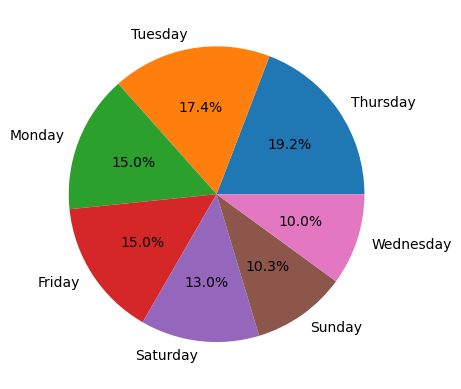

In [469]:
plt.pie(booking_day, labels = booking_day.index, autopct = '%1.1f%%')
plt.pie

In [471]:
# 4) For each of the service names, display the total number of bookings and the total Gross Booking Value in INR.

print("Total bookings on each service\n", bookings.service_name.value_counts())

Total bookings on each service
 service_name
GOIBIBO    186
YATRA      105
MMT         48
Name: count, dtype: int64


In [473]:
gross_income = bookings.groupby("service_name").agg(gross_income = ("INR_Amount", "sum"))
print("Gross booking value on each service:\n",gross_income)

Gross booking value on each service:
               gross_income
service_name              
GOIBIBO         5897637.97
MMT              665669.08
YATRA           3378702.13


In [475]:
# 5) For customers who have more than 1 booking, which is the most booked route (from_city to to_city)?

bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339 entries, 0 to 338
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   customer_id        339 non-null    object             
 1   booking_id         339 non-null    object             
 2   from_city          339 non-null    object             
 3   from_country       339 non-null    object             
 4   to_city            339 non-null    object             
 5   to_country         339 non-null    object             
 6   booking_time       339 non-null    object             
 7   device_type_used   339 non-null    object             
 8   INR_Amount         339 non-null    float64            
 9   service_name       339 non-null    object             
 10  no_of_passengers   339 non-null    float64            
 11  days_to_departure  339 non-null    float64            
 12  distance_km        339 non-null    float64        

In [477]:
bookings_of_customer = bookings.groupby("customer_id").agg(bookings_of_customer = ("booking_id","count"))
bookings_of_customer.value_counts()

bookings_of_customer
1                       280
2                        20
3                         5
4                         1
Name: count, dtype: int64

In [479]:
bookings_of_customer

,bookings_of_customer
customer_id,
customer_0,1
customer_1,1
customer_10,1
customer_100,1
customer_101,1
...,...
customer_95,1
customer_96,1
customer_97,4


In [481]:
customer_= bookings_of_customer[bookings_of_customer["bookings_of_customer"]>1]
customer_

,bookings_of_customer
customer_id,
customer_120,2
customer_137,2
customer_144,2
customer_155,2
customer_160,3
customer_176,3
customer_179,2
customer_200,2
customer_217,3


In [483]:
customer_.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26 entries, customer_120 to customer_97
Data columns (total 1 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   bookings_of_customer  26 non-null     int64
dtypes: int64(1)
memory usage: 416.0+ bytes


In [485]:
customer_.value_counts()

bookings_of_customer
2                       20
3                        5
4                        1
Name: count, dtype: int64

In [487]:
customer_route = customer_.merge(bookings, on = ["customer_id"], how = "left")
customer_route

,customer_id,bookings_of_customer,booking_id,from_city,from_country,to_city,to_country,booking_time,device_type_used,INR_Amount,service_name,no_of_passengers,days_to_departure,distance_km,booking_date_time,day
0,customer_120,2,booking_151,Delhi,India,Jammu,India,2020-02-03T13:56:36Z,Desktop,4604.80,MMT,1.0,1.0,506.9,2020-02-03 13:56:36+00:00,Monday
1,customer_120,2,booking_299,Jammu,India,Dubai,United Arab Emirates,2020-02-13T18:16:04Z,Desktop,16753.73,YATRA,1.0,5.0,2076.5,2020-02-13 18:16:04+00:00,Thursday
2,customer_137,2,booking_88,Gurgaon,India,Birmingham,United Kingdom,2019-12-22T08:49:25Z,IOS,46142.40,YATRA,1.0,19.0,7190.9,2019-12-22 08:49:25+00:00,Sunday
3,customer_137,2,booking_190,Gurgaon,India,Rāja Sānsi,India,2020-01-26T13:38:44Z,IOS,12094.40,GOIBIBO,1.0,1.0,421.0,2020-01-26 13:38:44+00:00,Sunday
4,customer_144,2,booking_296,Surat,India,Devanhalli,India,2020-02-09T16:50:05Z,Desktop,8208.80,GOIBIBO,1.0,1.0,1022.5,2020-02-09 16:50:05+00:00,Sunday
5,customer_144,2,booking_173,Ahmedabad,India,Gwalior,India,2020-02-07T17:54:36Z,Desktop,16905.46,GOIBIBO,1.0,2.0,664.7,2020-02-07 17:54:36+00:00,Friday
6,customer_155,2,booking_261,Jaipur,India,Agra,India,2020-01-24T08:28:21Z,IOS,2008.00,GOIBIBO,1.0,11.0,222.7,2020-01-24 08:28:21+00:00,Friday
7,customer_155,2,booking_54,Gurgaon,India,Varanasi,India,2020-01-21T21:13:42Z,IOS,4555.20,YATRA,1.0,6.0,688.7,2020-01-21 21:13:42+00:00,Tuesday
8,customer_160,3,booking_313,Mumbai,India,Lucknow,India,2020-01-28T16:47:01Z,Desktop,9441.95,MMT,1.0,3.0,1193.1,2020-01-28 16:47:01+00:00,Tuesday
9,customer_160,3,booking_122,Patna,India,Gurgaon,India,2020-01-28T18:27:20Z,Desktop,6440.11,MMT,1.0,1.0,862.3,2020-01-28 18:27:20+00:00,Tuesday


In [489]:
customer_route["route"] = customer_rout["from_city"] + " to " + customer_rout["to_city"]
customer_route

,customer_id,bookings_of_customer,booking_id,from_city,from_country,to_city,to_country,booking_time,device_type_used,INR_Amount,service_name,no_of_passengers,days_to_departure,distance_km,booking_date_time,day,route
0,customer_120,2,booking_151,Delhi,India,Jammu,India,2020-02-03T13:56:36Z,Desktop,4604.80,MMT,1.0,1.0,506.9,2020-02-03 13:56:36+00:00,Monday,Delhi to Jammu
1,customer_120,2,booking_299,Jammu,India,Dubai,United Arab Emirates,2020-02-13T18:16:04Z,Desktop,16753.73,YATRA,1.0,5.0,2076.5,2020-02-13 18:16:04+00:00,Thursday,Jammu to Dubai
2,customer_137,2,booking_88,Gurgaon,India,Birmingham,United Kingdom,2019-12-22T08:49:25Z,IOS,46142.40,YATRA,1.0,19.0,7190.9,2019-12-22 08:49:25+00:00,Sunday,Gurgaon to Birmingham
3,customer_137,2,booking_190,Gurgaon,India,Rāja Sānsi,India,2020-01-26T13:38:44Z,IOS,12094.40,GOIBIBO,1.0,1.0,421.0,2020-01-26 13:38:44+00:00,Sunday,Gurgaon to Rāja Sānsi
4,customer_144,2,booking_296,Surat,India,Devanhalli,India,2020-02-09T16:50:05Z,Desktop,8208.80,GOIBIBO,1.0,1.0,1022.5,2020-02-09 16:50:05+00:00,Sunday,Surat to Devanhalli
5,customer_144,2,booking_173,Ahmedabad,India,Gwalior,India,2020-02-07T17:54:36Z,Desktop,16905.46,GOIBIBO,1.0,2.0,664.7,2020-02-07 17:54:36+00:00,Friday,Ahmedabad to Gwalior
6,customer_155,2,booking_261,Jaipur,India,Agra,India,2020-01-24T08:28:21Z,IOS,2008.00,GOIBIBO,1.0,11.0,222.7,2020-01-24 08:28:21+00:00,Friday,Jaipur to Agra
7,customer_155,2,booking_54,Gurgaon,India,Varanasi,India,2020-01-21T21:13:42Z,IOS,4555.20,YATRA,1.0,6.0,688.7,2020-01-21 21:13:42+00:00,Tuesday,Gurgaon to Varanasi
8,customer_160,3,booking_313,Mumbai,India,Lucknow,India,2020-01-28T16:47:01Z,Desktop,9441.95,MMT,1.0,3.0,1193.1,2020-01-28 16:47:01+00:00,Tuesday,Mumbai to Lucknow
9,customer_160,3,booking_122,Patna,India,Gurgaon,India,2020-01-28T18:27:20Z,Desktop,6440.11,MMT,1.0,1.0,862.3,2020-01-28 18:27:20+00:00,Tuesday,Patna to Gurgaon


In [491]:
customer_route["route"].value_counts()

route
Gurgaon to Roissy-en-France         5
Gurgaon to Rāja Sānsi               3
Gurgaon to Bhubaneswar              2
Gurgaon to Bagdogra                 2
Gurgaon to Paris                    2
Bālāpur to Düsseldorf               2
Devanhalli to Gurgaon               2
Durlaga to Bhubaneswar              2
Gurgaon to Tiruchi                  2
Gurgaon to Mumbai                   1
Delhi to Paris                      1
Gurgaon to Lisbon                   1
Gurgaon to Fiumicino                1
Rāja Sānsi to Gurgaon               1
Madhyamgram to Frankfurt am Main    1
Kolkata to Gurgaon                  1
Thiruvananthapuram to London        1
Indore to Mumbai                    1
Mumbai to Chicalim                  1
Bikaner to Gurgaon                  1
Gurgaon to Berlin                   1
Dharamsala to Gurgaon               1
Delhi to Yol                        1
Pune to Nagpur                      1
Delhi to Jammu                      1
Kochi to London                     1
Barelā

In [493]:
print("The most booked route is from", customer_rout["route"].value_counts().idxmax())

The most booked route is from Gurgaon to Roissy-en-France


In [495]:
# 6) Which are the top 3 departure cities from where customers book mostly in advance, provided that there have been at least 5 departures from that city?

bookings

,customer_id,booking_id,from_city,from_country,to_city,to_country,booking_time,device_type_used,INR_Amount,service_name,no_of_passengers,days_to_departure,distance_km,booking_date_time,day
0,customer_259,booking_82,Gurgaon,India,Ahmedabad,India,2020-02-05T16:12:08Z,Desktop,2565.28,MMT,1.0,10.0,747.8,2020-02-05 16:12:08+00:00,Wednesday
1,customer_303,booking_156,Delhi,India,Brussels,Belgium,2018-11-21T08:21:47Z,Android,23120.00,YATRA,1.0,1.0,6701.5,2018-11-21 08:21:47+00:00,Wednesday
2,customer_203,booking_99,Devanhalli,India,Frankfurt am Main,Germany,2019-12-16T22:54:58Z,Android,25717.60,YATRA,1.0,32.0,7712.0,2019-12-16 22:54:58+00:00,Monday
3,customer_211,booking_319,Gurgaon,India,Frankfurt am Main,Germany,2021-10-29T12:25:38Z,Desktop,135969.60,GOIBIBO,2.0,69.0,6112.5,2021-10-29 12:25:38+00:00,Friday
4,customer_287,booking_222,Gurgaon,India,Roissy-en-France,France,2020-08-11T16:09:10Z,Android,31791.20,GOIBIBO,1.0,3.0,6570.4,2020-08-11 16:09:10+00:00,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,customer_133,booking_238,Gurgaon,India,Rāja Sānsi,India,2020-02-14T14:20:20Z,IOS,2721.60,YATRA,1.0,26.0,421.0,2020-02-14 14:20:20+00:00,Friday
335,customer_235,booking_37,Gurgaon,India,Bhubaneswar,India,2020-03-21T06:40:56Z,Android,6552.00,GOIBIBO,1.0,0.0,1274.7,2020-03-21 06:40:56+00:00,Saturday
336,customer_62,booking_239,Gurgaon,India,Birmingham,United Kingdom,2020-01-31T20:35:35Z,Desktop,126502.46,GOIBIBO,2.0,109.0,7190.9,2020-01-31 20:35:35+00:00,Friday
337,customer_5,booking_131,Mumbai,India,Kloten,Switzerland,2018-10-11T14:31:28Z,Desktop,55152.80,YATRA,2.0,22.0,6760.0,2018-10-11 14:31:28+00:00,Thursday


In [497]:
advance_booking = bookings[bookings["days_to_departure"]>0]
advance_booking

,customer_id,booking_id,from_city,from_country,to_city,to_country,booking_time,device_type_used,INR_Amount,service_name,no_of_passengers,days_to_departure,distance_km,booking_date_time,day
0,customer_259,booking_82,Gurgaon,India,Ahmedabad,India,2020-02-05T16:12:08Z,Desktop,2565.28,MMT,1.0,10.0,747.8,2020-02-05 16:12:08+00:00,Wednesday
1,customer_303,booking_156,Delhi,India,Brussels,Belgium,2018-11-21T08:21:47Z,Android,23120.00,YATRA,1.0,1.0,6701.5,2018-11-21 08:21:47+00:00,Wednesday
2,customer_203,booking_99,Devanhalli,India,Frankfurt am Main,Germany,2019-12-16T22:54:58Z,Android,25717.60,YATRA,1.0,32.0,7712.0,2019-12-16 22:54:58+00:00,Monday
3,customer_211,booking_319,Gurgaon,India,Frankfurt am Main,Germany,2021-10-29T12:25:38Z,Desktop,135969.60,GOIBIBO,2.0,69.0,6112.5,2021-10-29 12:25:38+00:00,Friday
4,customer_287,booking_222,Gurgaon,India,Roissy-en-France,France,2020-08-11T16:09:10Z,Android,31791.20,GOIBIBO,1.0,3.0,6570.4,2020-08-11 16:09:10+00:00,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
333,customer_67,booking_328,Devanhalli,India,Gurgaon,India,2020-10-15T14:43:32Z,Desktop,5635.73,MMT,1.0,2.0,1694.7,2020-10-15 14:43:32+00:00,Thursday
334,customer_133,booking_238,Gurgaon,India,Rāja Sānsi,India,2020-02-14T14:20:20Z,IOS,2721.60,YATRA,1.0,26.0,421.0,2020-02-14 14:20:20+00:00,Friday
336,customer_62,booking_239,Gurgaon,India,Birmingham,United Kingdom,2020-01-31T20:35:35Z,Desktop,126502.46,GOIBIBO,2.0,109.0,7190.9,2020-01-31 20:35:35+00:00,Friday
337,customer_5,booking_131,Mumbai,India,Kloten,Switzerland,2018-10-11T14:31:28Z,Desktop,55152.80,YATRA,2.0,22.0,6760.0,2018-10-11 14:31:28+00:00,Thursday


In [503]:
(advance_booking["days_to_departure"]==0).value_counts()

days_to_departure
False    331
Name: count, dtype: int64

In [505]:
advance_ = advance_booking["from_city"].value_counts()
advance_

from_city
Gurgaon               131
Mumbai                 34
Delhi                  29
Devanhalli             24
Rāja Sānsi             17
Chennai                16
Ahmedabad               8
New Delhi               7
Madhyamgram             6
Bālāpur                 6
Hyderabad               4
Kochi                   4
Varanasi                4
Jaipur                  4
Thiruvananthapuram      4
Pune                    4
Surat                   4
Durlaga                 2
Angamāli                2
Bangalore               2
Patna                   2
Chicalim                2
Bhubaneswar             2
Kolkata                 2
Gannavaram              1
Hyderābād               1
Barelā                  1
Dharamsala              1
Jammu                   1
Ranchi                  1
Ferokh                  1
Agartala                1
Lucknow                 1
Mohali                  1
Nagpur                  1
Name: count, dtype: int64

In [507]:
advance_[:3]

from_city
Gurgaon    131
Mumbai      34
Delhi       29
Name: count, dtype: int64

In [509]:
# 7) Plot a heatmap displaying correlations of the numerical column and report which pair of numerical columns in the bookings data set,
# have the maximum correlation?

bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339 entries, 0 to 338
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   customer_id        339 non-null    object             
 1   booking_id         339 non-null    object             
 2   from_city          339 non-null    object             
 3   from_country       339 non-null    object             
 4   to_city            339 non-null    object             
 5   to_country         339 non-null    object             
 6   booking_time       339 non-null    object             
 7   device_type_used   339 non-null    object             
 8   INR_Amount         339 non-null    float64            
 9   service_name       339 non-null    object             
 10  no_of_passengers   339 non-null    float64            
 11  days_to_departure  339 non-null    float64            
 12  distance_km        339 non-null    float64        

In [511]:
numerical_column = bookings[["INR_Amount", "no_of_passengers", "days_to_departure", "distance_km"]]
correlation = numerical_column.corr()
correlation

,INR_Amount,no_of_passengers,days_to_departure,distance_km
INR_Amount,1.000000,0.397229,0.284534,0.623565
no_of_passengers,0.397229,1.000000,0.187128,0.001698
days_to_departure,0.284534,0.187128,1.000000,0.216972
distance_km,0.623565,0.001698,0.216972,1.000000


<Axes: >

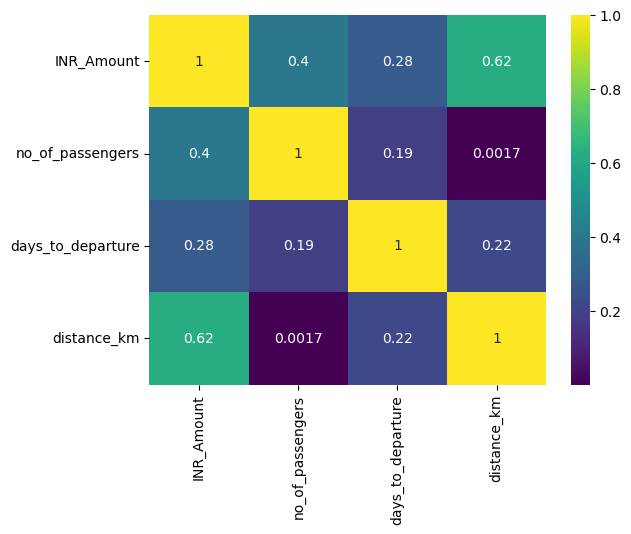

In [515]:
sns.heatmap(correlation, annot = True, cmap='viridis')

In [517]:
max_corr = correlation.unstack().drop_duplicates().sort_values(ascending = False)
max_corr

INR_Amount         INR_Amount           1.000000
                   distance_km          0.623565
                   no_of_passengers     0.397229
                   days_to_departure    0.284534
days_to_departure  distance_km          0.216972
no_of_passengers   days_to_departure    0.187128
                   distance_km          0.001698
dtype: float64

In [519]:
correlation_pair = correlation.unstack().drop_duplicates().sort_values(ascending = False).index[1]
correlation_pair

('INR_Amount', 'distance_km')

In [521]:
correlation_value = correlation.unstack().drop_duplicates().sort_values(ascending = False).iloc[1]
correlation_value

0.6235653096997817

In [523]:
print("Top correlation is", correlation_value,  "between", correlation_pair[0], "and", correlation_pair[1])

Top correlation is 0.6235653096997817 between INR_Amount and distance_km


In [525]:
# 8) For each service, which is the most used device type for making bookings on the platform?

bookings.groupby(["service_name", "device_type_used"]).size()

service_name  device_type_used
GOIBIBO       Android             44
              Desktop             61
              IOS                 70
              MobileWeb           11
MMT           Android              8
              Desktop             30
              IOS                  5
              MobileWeb            5
YATRA         Android             18
              Desktop             51
              IOS                 22
              MobileWeb           11
              Tablet               3
dtype: int64

In [527]:
device = bookings.groupby(["service_name", "device_type_used"]).size().unstack(fill_value = 0)
device

device_type_used,Android,Desktop,IOS,MobileWeb,Tablet
service_name,,,,,
GOIBIBO,44,61,70,11,0
MMT,8,30,5,5,0
YATRA,18,51,22,11,3


In [529]:
most_used_device = device.idxmax(axis = 1)
most_used_device

service_name
GOIBIBO        IOS
MMT        Desktop
YATRA      Desktop
dtype: object

In [531]:
# 9) Plot the trends at a quarterly frequency for the number of bookings by each of the
# device types, that is, plot a time series for each year and quarter showing the
# number of bookings performed by each device type.

bookings.set_index("booking_date_time", inplace = True)
quarterly_bookings = bookings.groupby("device_type_used").resample("Q").size().unstack(fill_value=0)
quarterly_bookings

C:\Users\marti\AppData\Local\Temp\ipykernel_4164\275207520.py:6: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_bookings = bookings.groupby("device_type_used").resample("Q").size().unstack(fill_value=0)


booking_date_time,2018-09-30 00:00:00+00:00,2018-12-31 00:00:00+00:00,2019-03-31 00:00:00+00:00,2019-06-30 00:00:00+00:00,2019-09-30 00:00:00+00:00,2019-12-31 00:00:00+00:00,2020-03-31 00:00:00+00:00,2020-06-30 00:00:00+00:00,2020-09-30 00:00:00+00:00,2020-12-31 00:00:00+00:00,2021-03-31 00:00:00+00:00,2021-06-30 00:00:00+00:00,2021-09-30 00:00:00+00:00,2021-12-31 00:00:00+00:00,2022-03-31 00:00:00+00:00,2022-06-30 00:00:00+00:00,2022-09-30 00:00:00+00:00
device_type_used,,,,,,,,,,,,,,,,,
Android,3,3,0,0,3,14,19,2,3,6,0,2,5,6,2,2,0
Desktop,6,22,1,1,7,15,29,0,0,12,11,10,6,10,8,2,2
IOS,0,4,0,0,4,14,25,0,4,2,5,3,5,14,10,6,1
MobileWeb,2,4,0,0,0,0,10,0,0,1,1,0,2,4,2,1,0
Tablet,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


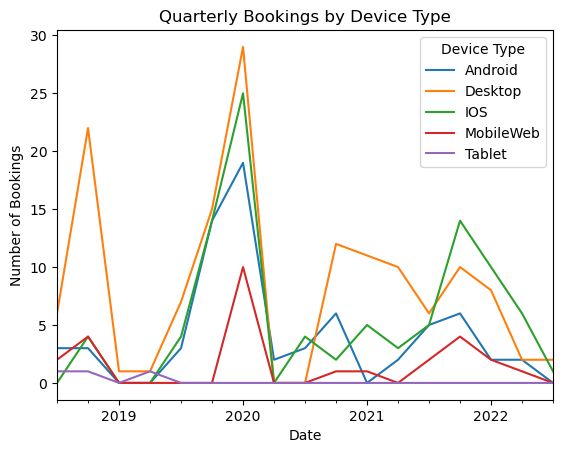

In [533]:
quarterly_bookings.T.plot(kind = "line")
plt.title('Quarterly Bookings by Device Type')
plt.xlabel('Date')
plt.ylabel('Number of Bookings')
plt.legend(title='Device Type')
plt.show()

In [535]:
# 10) Consider the following example:
# 12 customers performed a total of 100 searches but only a few of them performed
# 10 bookings in total.
# Searches = 100 ,bookings = 10 ,customers = 12
# The overall booking to search ratio, Ober, is 10/100 = 0.1 Using the above
# information/context, answer the following:
# • What is the average oBSR for each month of the year?
# • What is the average oBSR for each day of the week?
# • Plot a time series of oBSR on all the given dates.

merge_booking_session = sessions.merge(bookings, on = 'booking_id', how = 'left')
merge_booking_session

,session_id,search_id,search_time,session_starting_time,booking_id,customer_id,from_city,from_country,to_city,to_country,booking_time,device_type_used,INR_Amount,service_name,no_of_passengers,days_to_departure,distance_km,day
0,session_322,search_784,2020-01-21T21:35:38.910Z,2020-01-21T21:10:12Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,session_322,search_776,2020-01-21T21:37:37.697Z,2020-01-21T21:10:12Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,session_322,search_623,2020-01-21T21:36:11.392Z,2020-01-21T21:10:12Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,session_322,search_270,2020-01-21T21:16:07.685Z,2020-01-21T21:10:12Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,session_322,search_905,2020-01-21T21:34:55.673Z,2020-01-21T21:10:12Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1492,session_150,search_156,2018-12-18T22:59:43.764Z,2018-12-18T22:45:56Z,booking_120,customer_126,New Delhi,India,Manchester,United Kingdom,2018-12-18T23:02:22Z,IOS,18981.19,YATRA,1.0,42.0,7212.6,Tuesday
1493,session_120,search_1096,2021-12-23T17:29:37Z,2021-12-23T17:29:33.217Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1494,session_120,search_962,2021-12-23T17:34:39Z,2021-12-23T17:29:33.217Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1495,session_150,search_1306,2018-12-18T22:52:37.654Z,2018-12-18T22:45:56Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [537]:
merge_booking_session['search_time'] = pd.to_datetime(merge_booking_session['search_time'], errors='coerce')
merge_booking_session['booking_time'] = pd.to_datetime(merge_booking_session['booking_time'], errors='coerce')

dailysearches = merge_booking_session.groupby(merge_booking_session['search_time'].dt.date).size()
dailysearches

search_time
2018-09-04     3
2018-09-11     2
2018-09-21     5
2018-09-23     1
2018-09-24     3
              ..
2020-03-16    14
2020-03-18    10
2020-03-19     8
2020-03-20     3
2020-03-21     1
Length: 129, dtype: int64

In [539]:
dailybookings = merge_booking_session.groupby(merge_booking_session['booking_time'].dt.date).size()
print("Daily Bookings are : \n\n",dailybookings)

Daily Bookings are : 

 booking_time
2018-09-04    1
2018-09-11    2
2018-09-21    2
2018-09-23    1
2018-09-24    1
             ..
2022-06-04    1
2022-06-29    2
2022-07-01    1
2022-07-06    1
2022-07-11    2
Length: 257, dtype: int64


In [541]:
daily_oBSR = dailybookings/dailysearches
print("Daily oBSR are : \n\n",daily_oBSR)

Daily oBSR are : 

 2018-09-04    0.333333
2018-09-11    1.000000
2018-09-21    0.400000
2018-09-23    1.000000
2018-09-24    0.333333
                ...   
2022-06-04         NaN
2022-06-29         NaN
2022-07-01         NaN
2022-07-06         NaN
2022-07-11         NaN
Length: 258, dtype: float64


In [543]:
daily_oBSR.index = pd.to_datetime(daily_oBSR.index)
monthly_oBSR = daily_oBSR.resample('M').mean()
print("Monthly oBSR are : \n\n",monthly_oBSR)

Monthly oBSR are : 

 2018-09-30    0.518681
2018-10-31    0.221212
2018-11-30    0.535828
2018-12-31    0.407937
2019-01-31    0.400000
2019-02-28         NaN
2019-03-31         NaN
2019-04-30         NaN
2019-05-31         NaN
2019-06-30    1.000000
2019-07-31    0.235606
2019-08-31    0.350000
2019-09-30    0.677656
2019-10-31    0.602561
2019-11-30    0.610746
2019-12-31    0.464010
2020-01-31    0.304959
2020-02-29    0.466192
2020-03-31    0.502513
2020-04-30         NaN
2020-05-31         NaN
2020-06-30         NaN
2020-07-31         NaN
2020-08-31         NaN
2020-09-30         NaN
2020-10-31         NaN
2020-11-30         NaN
2020-12-31         NaN
2021-01-31         NaN
2021-02-28         NaN
2021-03-31         NaN
2021-04-30         NaN
2021-05-31         NaN
2021-06-30         NaN
2021-07-31         NaN
2021-08-31         NaN
2021-09-30         NaN
2021-10-31         NaN
2021-11-30         NaN
2021-12-31         NaN
2022-01-31         NaN
2022-02-28         NaN
2022-03-31  

C:\Users\marti\AppData\Local\Temp\ipykernel_4164\2334383928.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_oBSR = daily_oBSR.resample('M').mean()


In [545]:
day_oBSR = daily_oBSR.groupby(daily_oBSR.index.day_name()).mean()
print("Day oBSR are : \n\n",day_oBSR)

Day oBSR are : 

 Friday       0.420565
Monday       0.427265
Saturday     0.429127
Sunday       0.525412
Thursday     0.527210
Tuesday      0.447253
Wednesday    0.382970
dtype: float64


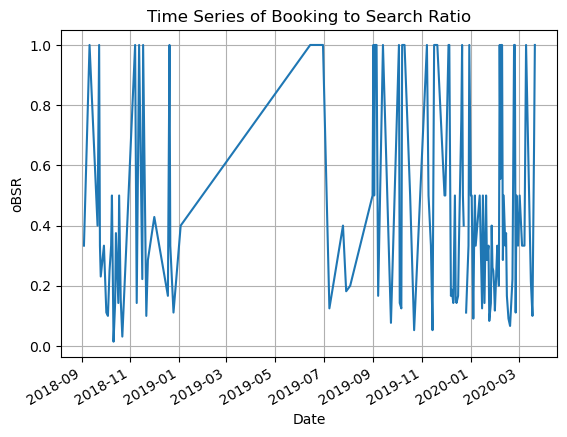

In [547]:
daily_oBSR.plot(kind = 'line')
plt.title('Time Series of Booking to Search Ratio')
plt.xlabel('Date')
plt.ylabel('oBSR')
plt.grid(True)
plt.show()

In [565]:
daybookings = merge_booking_session.groupby(merge_booking_session['day']).size()
print("Day Bookings are : \n\n", daybookings)

Day Bookings are : 

 day
Friday       57
Monday       54
Saturday     49
Sunday       38
Thursday     70
Tuesday      62
Wednesday    36
dtype: int64


In [567]:
merge_booking_session['search_day'] = merge_booking_session['search_time'].dt.day_name()
merge_booking_session

,session_id,search_id,search_time,session_starting_time,booking_id,customer_id,from_city,from_country,to_city,to_country,booking_time,device_type_used,INR_Amount,service_name,no_of_passengers,days_to_departure,distance_km,day,search_day
0,session_322,search_784,2020-01-21 21:35:38.910000+00:00,2020-01-21T21:10:12Z,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tuesday
1,session_322,search_776,2020-01-21 21:37:37.697000+00:00,2020-01-21T21:10:12Z,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tuesday
2,session_322,search_623,2020-01-21 21:36:11.392000+00:00,2020-01-21T21:10:12Z,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tuesday
3,session_322,search_270,2020-01-21 21:16:07.685000+00:00,2020-01-21T21:10:12Z,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tuesday
4,session_322,search_905,2020-01-21 21:34:55.673000+00:00,2020-01-21T21:10:12Z,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1492,session_150,search_156,2018-12-18 22:59:43.764000+00:00,2018-12-18T22:45:56Z,booking_120,customer_126,New Delhi,India,Manchester,United Kingdom,2018-12-18 23:02:22+00:00,IOS,18981.19,YATRA,1.0,42.0,7212.6,Tuesday,Tuesday
1493,session_120,search_1096,NaT,2021-12-23T17:29:33.217Z,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1494,session_120,search_962,NaT,2021-12-23T17:29:33.217Z,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1495,session_150,search_1306,2018-12-18 22:52:37.654000+00:00,2018-12-18T22:45:56Z,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Tuesday


In [569]:
day_search = merge_booking_session.groupby(merge_booking_session['search_day']).size()
day_search

search_day
Friday       137
Monday       152
Saturday     137
Sunday        58
Thursday     188
Tuesday      146
Wednesday    106
dtype: int64

In [571]:
day_oBSR = daybookings/day_search
day_oBSR

day
Friday       0.416058
Monday       0.355263
Saturday     0.357664
Sunday       0.655172
Thursday     0.372340
Tuesday      0.424658
Wednesday    0.339623
dtype: float64